In [3]:
import db_connect
import pandas
import matplotlib.pyplot as plt   # 資料視覺化套件
import matplotlib

In [4]:
# 建立與MySQL的連線
my_connt_obj = db_connect.mysql_connect()
conn = my_connt_obj.connect()

In [5]:
# 取得三大法人留倉的資料
df_legal = pandas.read_sql("SELECT * FROM LegalDailyFutureOption WHERE TradeDate >'2021-01-01'", con=conn)
# 檢查取得的資料
print(df_legal.head() )
print(df_legal.tail() )

     ID   TradeDate TradeGroup  FutureLongQty  OptionLongQty  \
0  1702  2021-01-04        自營商          44825         299979   
1  1703  2021-01-04         投信           1074              0   
2  1704  2021-01-04      外資及陸資         221945         119581   
3  1705  2021-01-05        自營商          47529         315676   
4  1706  2021-01-05         投信            140              0   

   FutureLongAmount  OptionLongAmount  FutureShortQty  OptionShortQty  \
0          55528800            859221           44135          288910   
1           3194145                 0              38               0   
2         268724584            489704          226723          114025   
3          57540843            785785           48187          318032   
4            382291                 0             201               0   

   FutureShortAmount  ...  OptionLongOIAmount  FutureShortOIQty  \
0           52060022  ...              847983            108997   
1             112922  ...                 

In [6]:
# 取得加權指數的資料
df_taiex = pandas.read_sql("SELECT * FROM StockTransactionInfo WHERE TradeDate >'2021-01-01'", con=conn)

In [7]:
# 關閉連線
conn.close() 

In [13]:
# 投信 資料
df_investment = df_legal.loc[df_legal['TradeGroup'] == "投信"]
# df_investment.head()  #查看資料

# 自營商 資料
df_self = df_legal.loc[df_legal['TradeGroup'] == "自營商"]
# df_self.head()    #查看資料

# 外資 資料
df_foreign= df_legal.loc[df_legal['TradeGroup'] == "外資及陸資"]
# df_foreign.head()     #查看資料

<AxesSubplot:xlabel='TradeDate'>

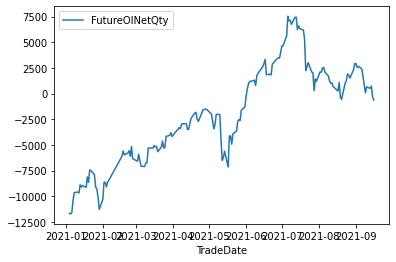

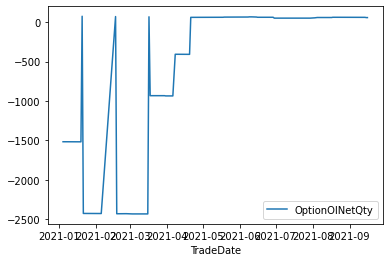

In [9]:
#畫圖：投信
df_investment.plot("TradeDate", "FutureOINetQty")
df_investment.plot("TradeDate", "OptionOINetQty")

<AxesSubplot:xlabel='TradeDate'>

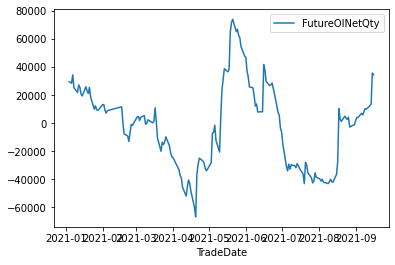

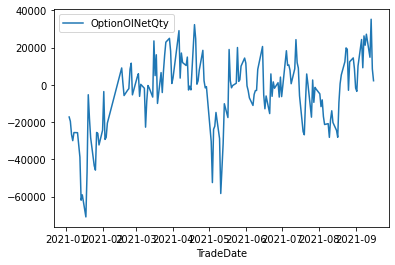

In [11]:
#畫圖：自營
df_self.plot("TradeDate", "FutureOINetQty")
df_self.plot("TradeDate", "OptionOINetQty")

<AxesSubplot:xlabel='TradeDate'>

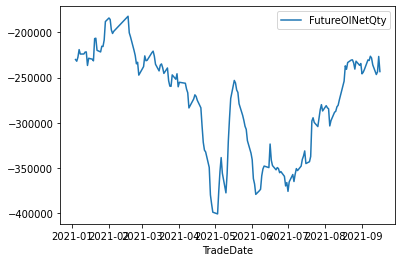

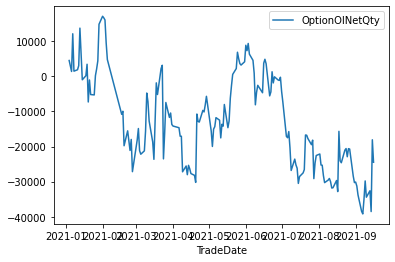

In [10]:
#畫圖：外資
df_foreign.plot("TradeDate", "FutureOINetQty")
df_foreign.plot("TradeDate", "OptionOINetQty")

<AxesSubplot:xlabel='TradeDate'>

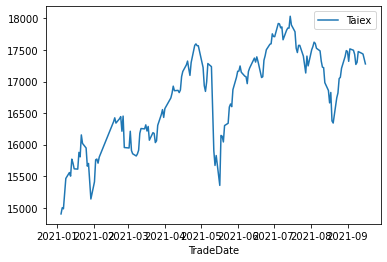

In [12]:
# 畫圖：加權指數
df_taiex.plot(x="TradeDate", y="Taiex")
